In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sn
sn.set(color_codes = True)
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import svm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [2]:
data = pd.read_csv("vehicle.csv")
print(data.shape)
data.head()

(846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [3]:
# Finding out missing values
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [4]:
data.info()           # there is only 1 catgorical variable class in the dataset. hence we can drop it from the data set for PCA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [5]:
# droppinf the categorical variable or the dependent variable from the dataframe
cdata = data.drop(['class'], axis = 1)
cdata.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [6]:
cdata.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
# replacing all the missing values with median
medianfiller = lambda x : x.fillna(x.median())
updatedData = cdata.apply(medianfiller,axis=0)
print(updatedData.isnull().sum())
updatedData.head()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [8]:
updatedData.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

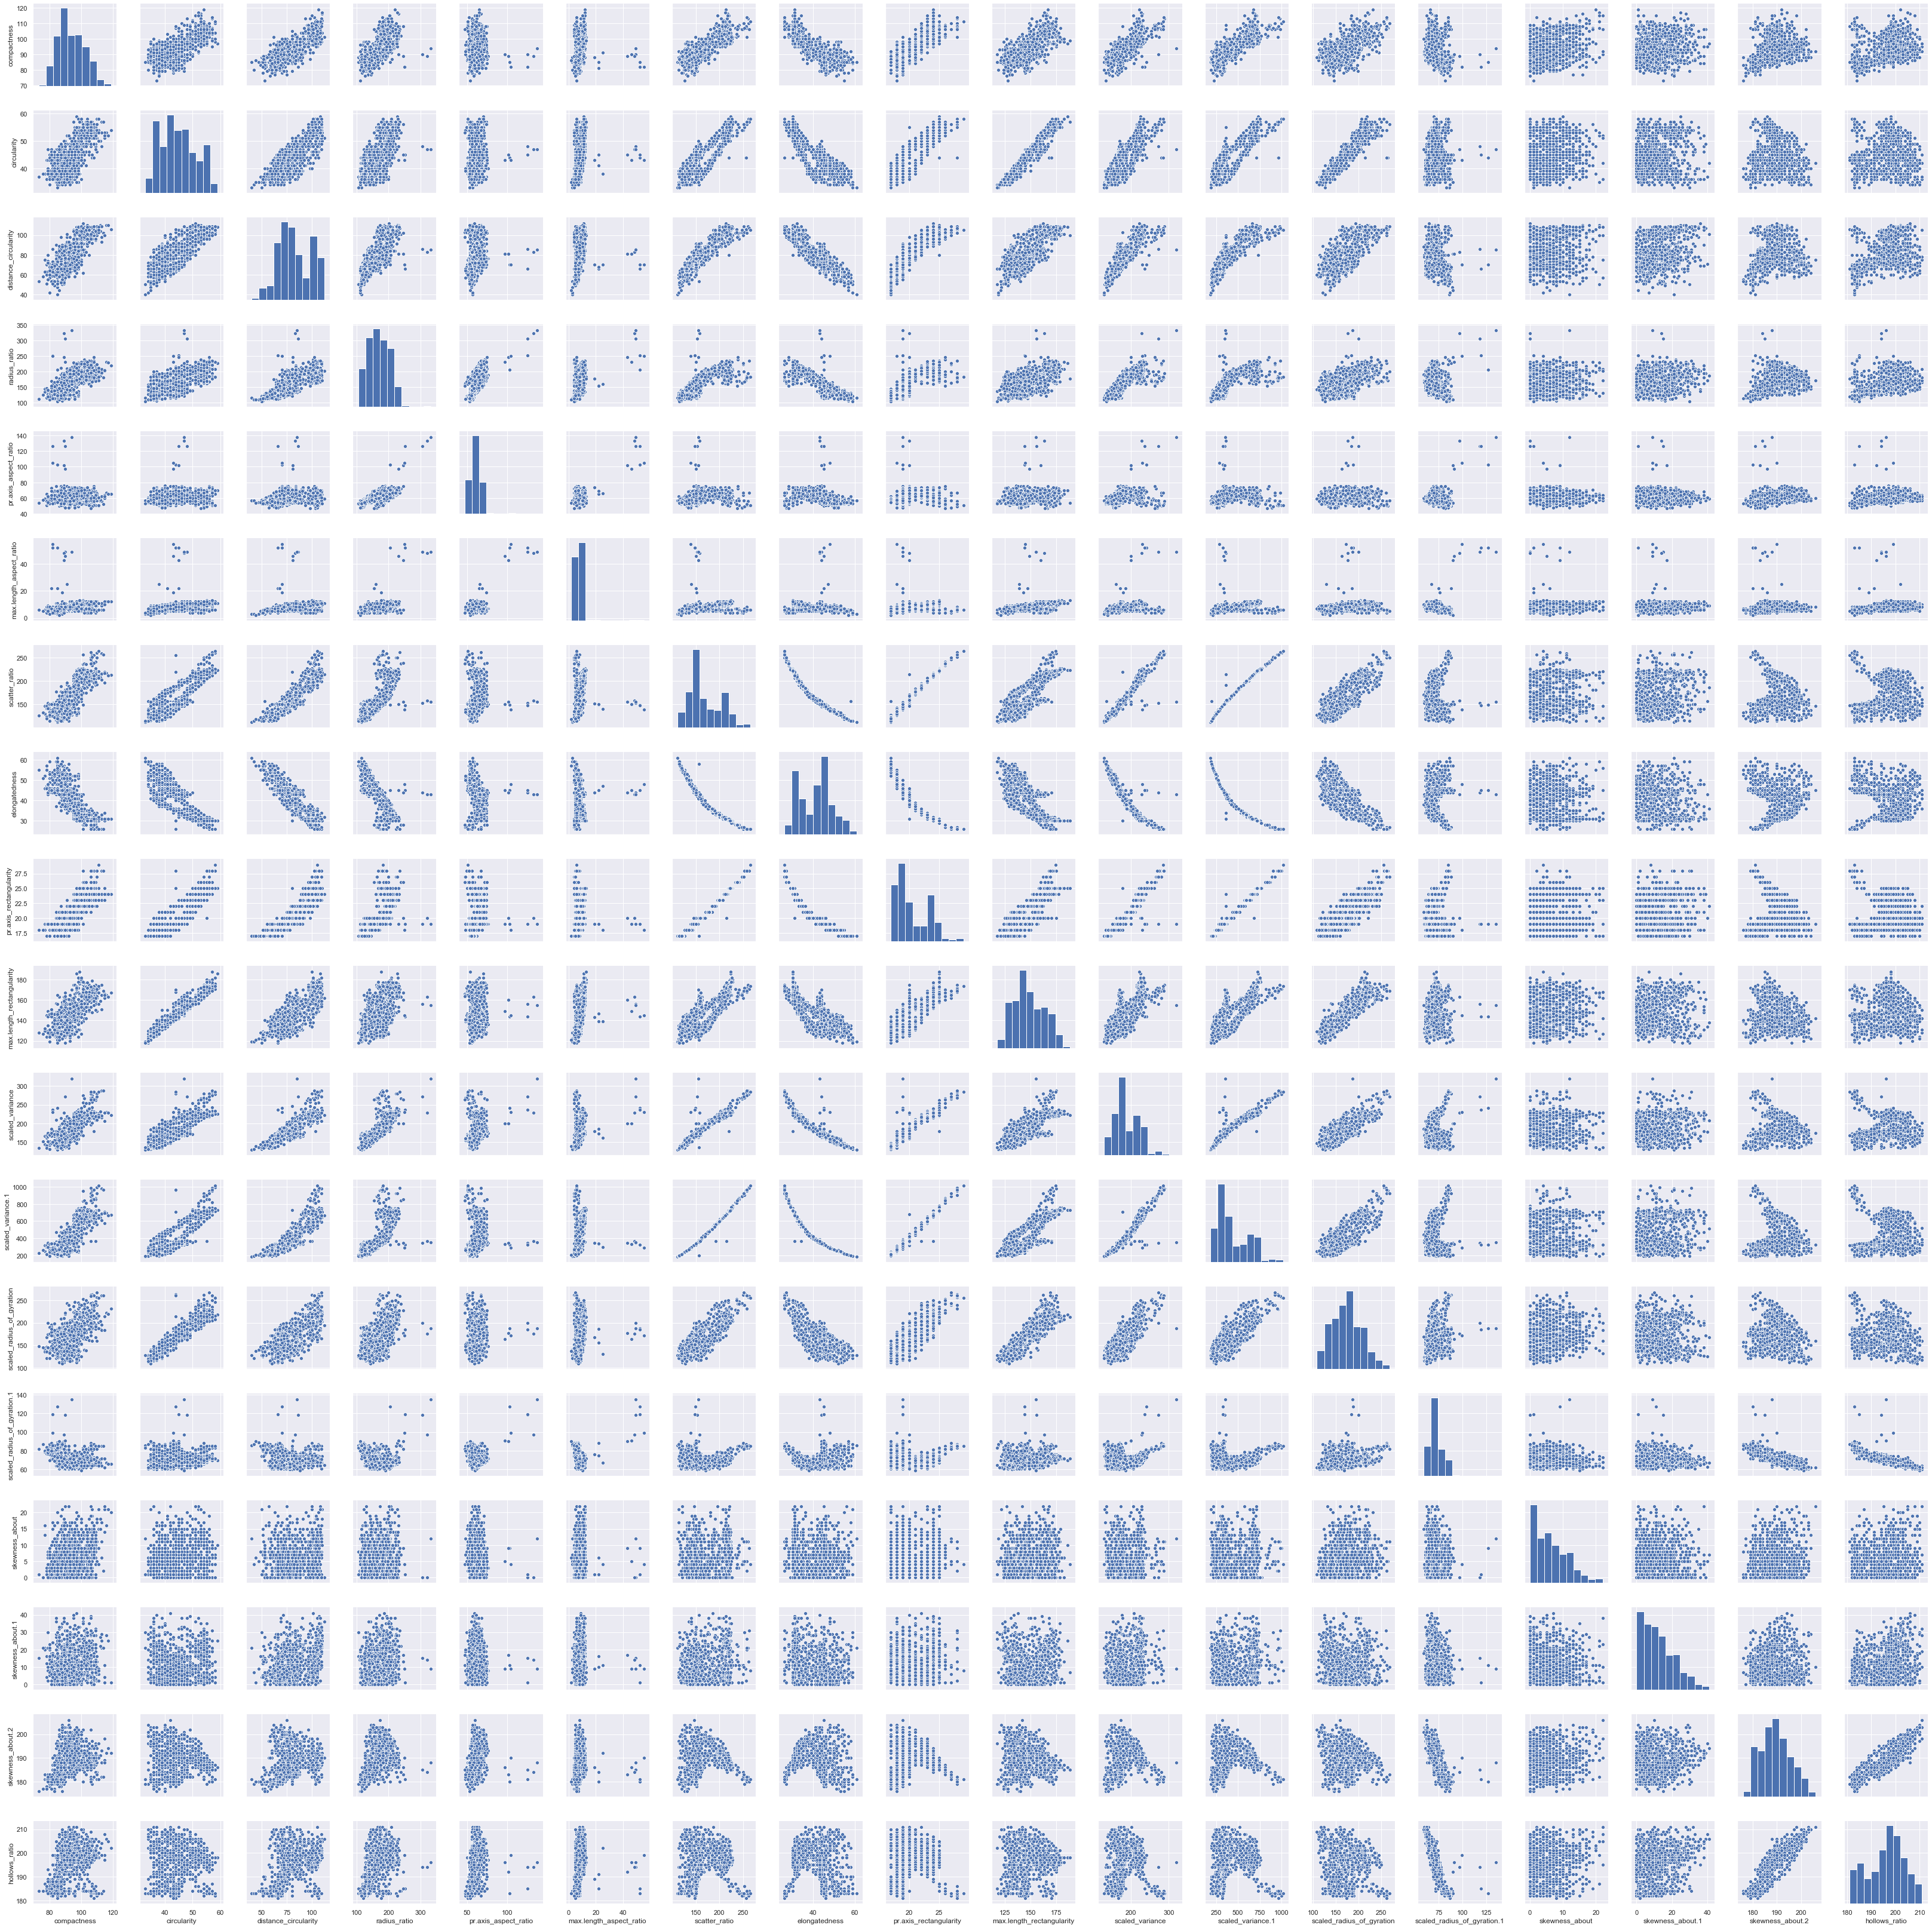

In [9]:
# Visualization

sn.pairplot(updatedData)

Text(0.5, 0, 'distance_circularity')

<Figure size 1440x360 with 0 Axes>

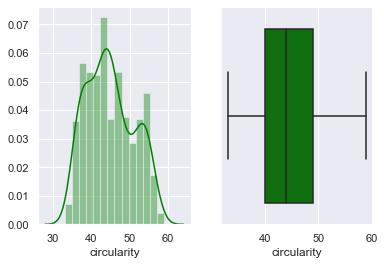

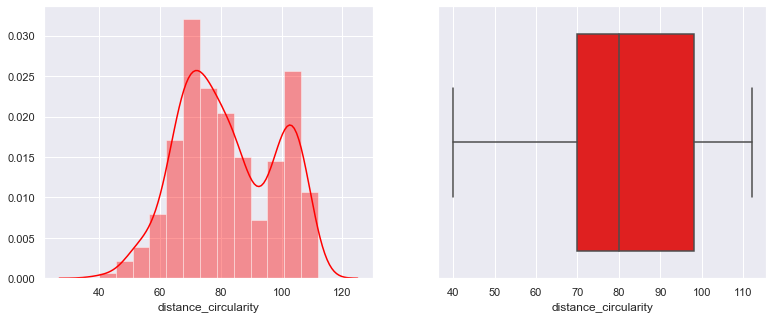

In [10]:
pt.figure(figsize = (20,5))
f, axes = pt.subplots(1,2)
sn.distplot(updatedData["circularity"], color = "green", ax = axes[0])
sn.boxplot(data["circularity"], color = 'green', ax = axes[1])
pt.xlabel("circularity")

pt.figure(figsize = (20,5))
pt.subplot(1,3,1)
sn.distplot(updatedData["distance_circularity"], color = "red")
pt.subplot(1,3,2)
sn.boxplot(data["distance_circularity"], color = 'red')
pt.xlabel("distance_circularity")


Text(0.5, 0, 'scatter_ratio')

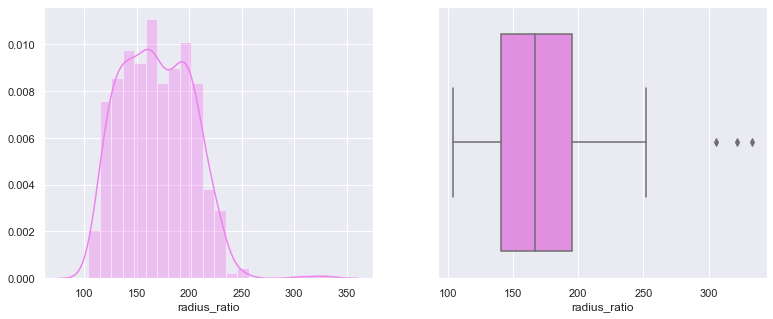

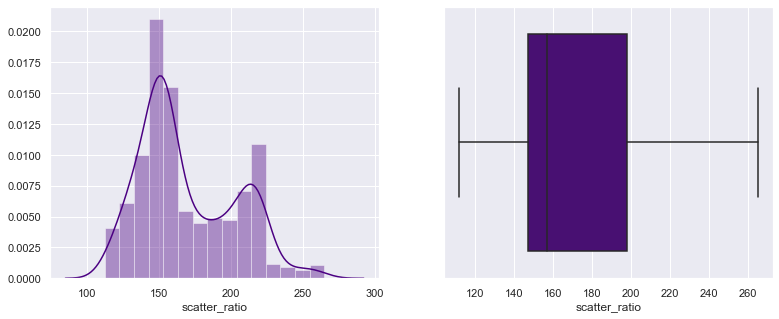

In [11]:
pt.figure(figsize = (20,5))
pt.subplot(1,3,1)
sn.distplot(updatedData["radius_ratio"], color = "violet")
pt.subplot(1,3,2)
sn.boxplot(data["radius_ratio"], color = 'violet')
pt.xlabel("radius_ratio")


pt.figure(figsize = (20,5))
pt.subplot(1,3,1)
sn.distplot(updatedData["scatter_ratio"], color = "indigo")
pt.subplot(1,3,2)
sn.boxplot(data["scatter_ratio"], color = 'indigo')
pt.xlabel("scatter_ratio")


## There are some outliers in radius_ratio

Text(0.5, 0, 'hollows_ratio')

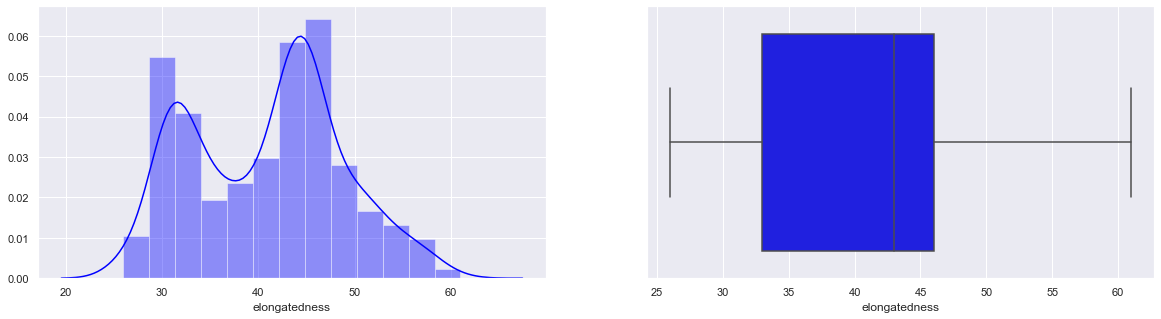

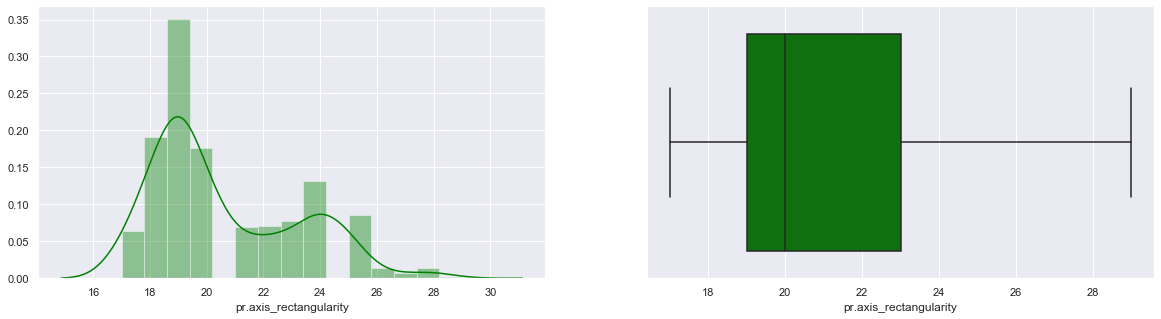

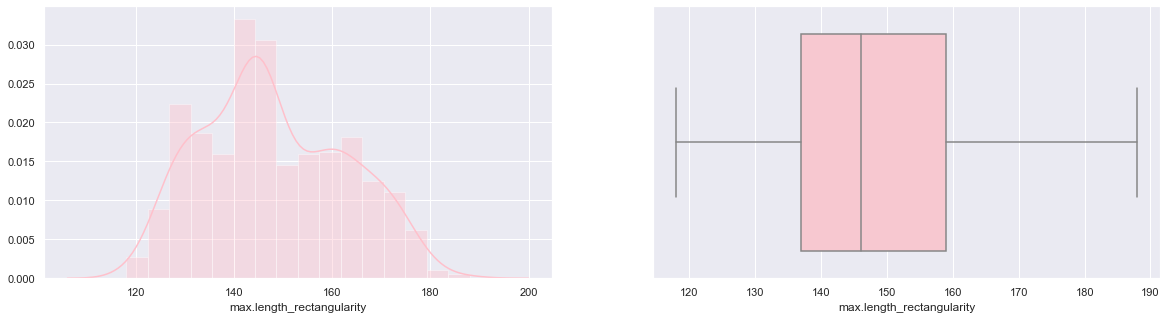

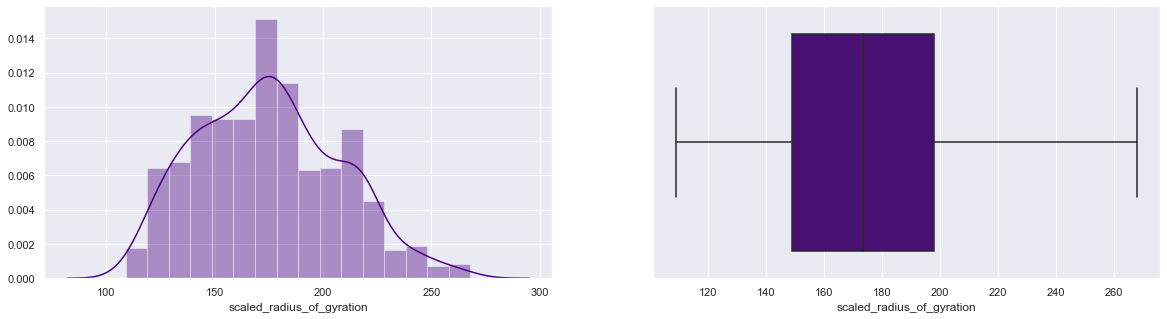

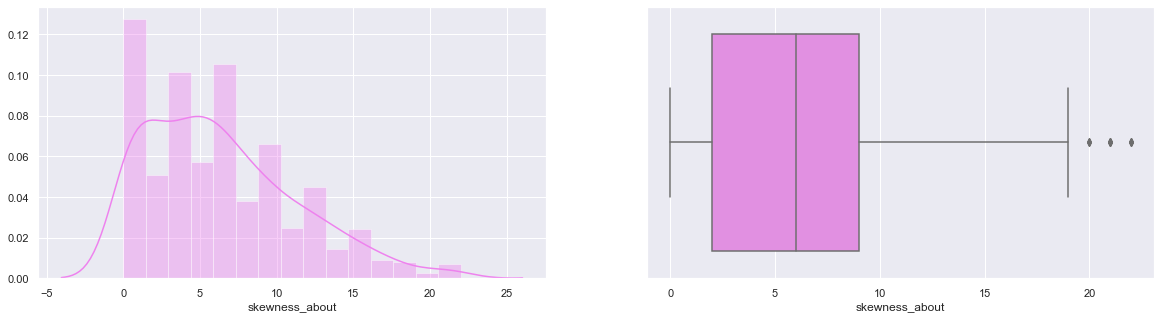

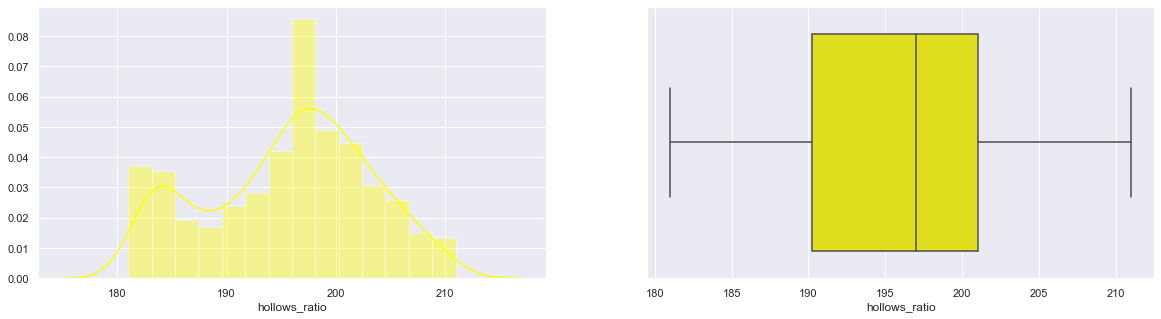

In [12]:
pt.figure(figsize = (20,5))
pt.subplot(1,2,1)
sn.distplot(updatedData["elongatedness"], color = "blue")
pt.subplot(1,2,2)
sn.boxplot(data["elongatedness"], color = 'blue')
pt.xlabel("elongatedness")

pt.figure(figsize = (20,5))
pt.subplot(1,2,1)
sn.distplot(updatedData["pr.axis_rectangularity"], color = "green")
pt.subplot(1,2,2)
sn.boxplot(data["pr.axis_rectangularity"], color = 'green')
pt.xlabel("pr.axis_rectangularity")

pt.figure(figsize = (20,5))
pt.subplot(1,2,1)
sn.distplot(updatedData["max.length_rectangularity"], color = "pink")
pt.subplot(1,2,2)
sn.boxplot(data["max.length_rectangularity"], color = 'pink')
pt.xlabel("max.length_rectangularity")

pt.figure(figsize = (20,5))
pt.subplot(1,2,1)
sn.distplot(updatedData["scaled_radius_of_gyration"], color = "indigo")
pt.subplot(1,2,2)
sn.boxplot(data["scaled_radius_of_gyration"], color = 'indigo')
pt.xlabel("scaled_radius_of_gyration")

pt.figure(figsize = (20,5))
pt.subplot(1,2,1)
sn.distplot(updatedData["skewness_about"], color = "violet")
pt.subplot(1,2,2)
sn.boxplot(data["skewness_about"], color = 'violet')
pt.xlabel("skewness_about")

pt.figure(figsize = (20,5))
pt.subplot(1,2,1)
sn.distplot(updatedData["hollows_ratio"], color = "yellow")
pt.subplot(1,2,2)
sn.boxplot(data["hollows_ratio"], color = 'yellow')
pt.xlabel("hollows_ratio")

### Observation: There are some outliers in Skewness variable too

## 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

In [13]:
updatedData.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                              0.015599       0.074458   
skewness_about.1                            0.043422       0.212428   
skewness_about.2                           -0.

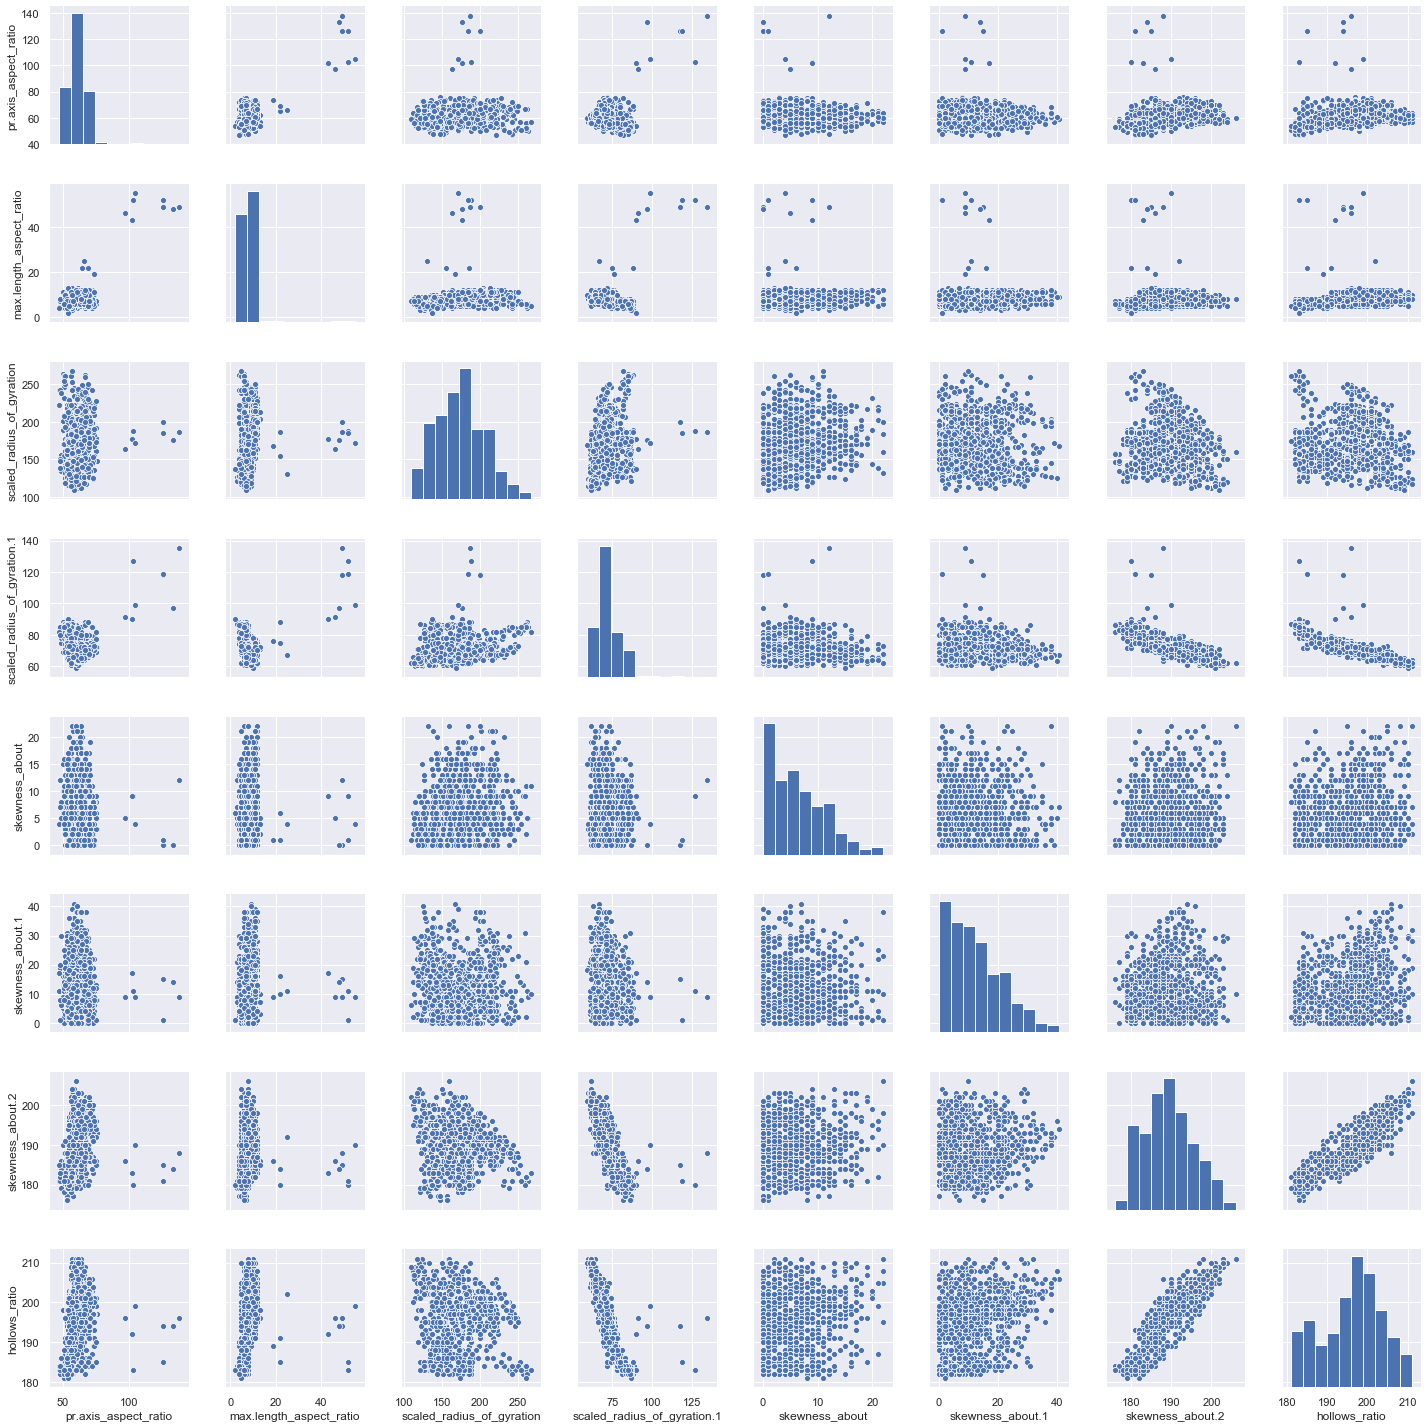

In [14]:
# from correlation below were the colums that were least corelated
sn.pairplot(updatedData[['pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_radius_of_gyration','scaled_radius_of_gyration.1',
'skewness_about',
'skewness_about.1',
'skewness_about.2',
'hollows_ratio']])

### Observation :  seeing the above pairplot and correlation table below are the few colums that have been dropped considering it is not affecting the accuracy much.

In [15]:

X1 = updatedData.drop(['skewness_about.2','skewness_about', 'skewness_about.1', 'max.length_aspect_ratio'], axis = 1)
y1 = data[['class']]

In [16]:
X1Scaled=X1.apply(zscore)
X1Scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  scatter_ratio  elongatedness  pr.axis_rectangularity  \
0              1.310398      -0.207598       0.136262               -0.224342   
1             -0.593753      -0.599423       0.520519               -0.610886   
2              0.548738       1.148719      -1.144597                0.935290   
3              0.167907      -0.750125       0.648605               -0.610886   
4              5.245643      -0.599423       0.520519               -0.610886   

   max.length_rectangularity  scaled_variance  scaled_variance.1  \
0                   0.758332        -0.401920          -0.341934   
1                  -0.344578        -0.593357          -0.619724   
2                   0.689401         1.097671           1.109379   
3                  -0.344578        -0.912419          -0.738777   
4                  -0.275646         1.671982          -0.648070   

   scaled_radius_of_gyration  scaled_radius_of_gyration.1  hollows_ratio  
0                   0.285705                    -0.327326       0.183957  
1                  -0.513630                    -0.059384       0.452977  
2                   1.392477                     0.074587       0.049447  
3                  -1.466683                    -1.265121       1.529056  
4                   0.408680                     7.309005      -1.699181

In [17]:
# a. C = 1 and kernel = linear
clf = svm.SVC(C=1, kernel = 'linear')
clf.fit(X1Scaled , y1)
print("Accuracy with C = 1 and linear kernel is :", clf.score(X1Scaled , y1))

# C = .5 and kernel = linear
clf1 = svm.SVC(C=.5, kernel = 'linear')
clf1.fit(X1Scaled , y1)
print("Accuracy with C = .5 and linear kernel is :", clf1.score(X1Scaled , y1))

# C = .05 and kernel = linear
clf2 = svm.SVC(C=.05, kernel = 'linear')
clf2.fit(X1Scaled , y1)
print("Accuracy with C = .05 and linear kernel is :", clf2.score(X1Scaled , y1))


# C = .01 and kernel = linear
clf3 = svm.SVC(C=.01, kernel = 'linear')
clf3.fit(X1Scaled , y1)
print("Accuracy with C = .01 and linear kernel is :", clf3.score(X1Scaled , y1))

Accuracy with C = 1 and linear kernel is : 0.9479905437352246
Accuracy with C = .5 and linear kernel is : 0.9432624113475178
Accuracy with C = .05 and linear kernel is : 0.9018912529550828
Accuracy with C = .01 and linear kernel is : 0.8156028368794326


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

## 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) 
## 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters

### For PCA All the columns are used and then based on the accuracy results it will be reduced by PCA technique

In [18]:
# independant variables
X = updatedData
# the dependent variable
y = data[['class']]

In [19]:
XScaled=X.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

In [20]:
# a. C = 1 and kernel = linear
clf = svm.SVC(C=1, kernel = 'linear')
clf.fit(XScaled , y)
print("Accuracy with C = 1 and linear kernel is :", clf.score(XScaled , y))

# C = .5 and kernel = linear
clf1 = svm.SVC(C=.5, kernel = 'linear')
clf1.fit(XScaled , y)
print("Accuracy with C = .5 and linear kernel is :", clf1.score(XScaled , y))

# C = .05 and kernel = linear
clf2 = svm.SVC(C=.05, kernel = 'linear')
clf2.fit(XScaled , y)
print("Accuracy with C = .05 and linear kernel is :", clf2.score(XScaled , y))


# C = .01 and kernel = linear
clf3 = svm.SVC(C=.01, kernel = 'linear')
clf3.fit(XScaled , y)
print("Accuracy with C = .01 and linear kernel is :", clf3.score(XScaled , y))


Accuracy with C = 1 and linear kernel is : 0.9609929078014184
Accuracy with C = .5 and linear kernel is : 0.9515366430260047
Accuracy with C = .05 and linear kernel is : 0.9278959810874704
Accuracy with C = .01 and linear kernel is : 0.8912529550827423


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [21]:
# a. C = 1 and kernel = linear
clf = svm.SVC(C=1, kernel = 'rbf', gamma = .025)
clf.fit(XScaled , y)
print("Accuracy with C = 1 and linear rbf is :", clf.score(XScaled , y))

# C = .5 and kernel = rbf
clf1 = svm.SVC(C=.5, kernel = 'rbf', gamma = .025)
clf1.fit(XScaled , y)
print("Accuracy with C = .5 and linear rbf is :", clf1.score(XScaled , y))

# C = .05 and kernel = rbf
clf2 = svm.SVC(C=.05, kernel = 'rbf', gamma = .025)
clf2.fit(XScaled , y)
print("Accuracy with C = .05 and linear rbf is :", clf2.score(XScaled , y))


# C = .01 and kernel = rbf
clf3 = svm.SVC(C=.01, kernel = 'rbf', gamma = .025)
clf3.fit(XScaled , y)
print("Accuracy with C = .01 and linear rbf is :", clf3.score(XScaled , y))

c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with C = 1 and linear rbf is : 0.9633569739952719


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with C = .5 and linear rbf is : 0.9468085106382979
Accuracy with C = .05 and linear rbf is : 0.6099290780141844
Accuracy with C = .01 and linear rbf is : 0.5070921985815603


### Observation - For linear kernel for increase in C accuracy increases and there is not much variation in accuracy range unlike in rbf kernel. In rbf with increase in C accuracy increases but there is huge variation in accuracy range

In [22]:
# Performing PCA with all columns
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [23]:
#Taking all columns first
pca = PCA()
pca.fit(XScaled)
print(pca.explained_variance_)
print(pca.components_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]
[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.7648438

In [24]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


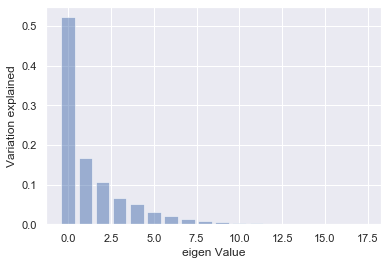

In [25]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

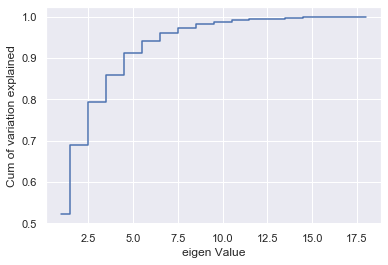

In [26]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [27]:
Xpca = pca.transform(XScaled)
# trying to find difference in accuracy after pca
clf = svm.SVC(C=1, kernel = 'linear')
clf.fit(Xpca , y)
print(clf.score(Xpca , y))

clf1= svm.SVC(C=1, kernel = 'rbf', gamma = .025)
clf1.fit(Xpca , y)
print(clf1.score(Xpca , y))

0.9609929078014184
0.9633569739952719


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Accuracy remains same after PCA as in PCA we have first considered all the columns

In [28]:
#with half the components
pca9 = PCA(n_components=9)
pca9.fit(XScaled)
print(pca9.components_)
print(pca9.explained_variance_ratio_)
Xpca9 = pca9.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

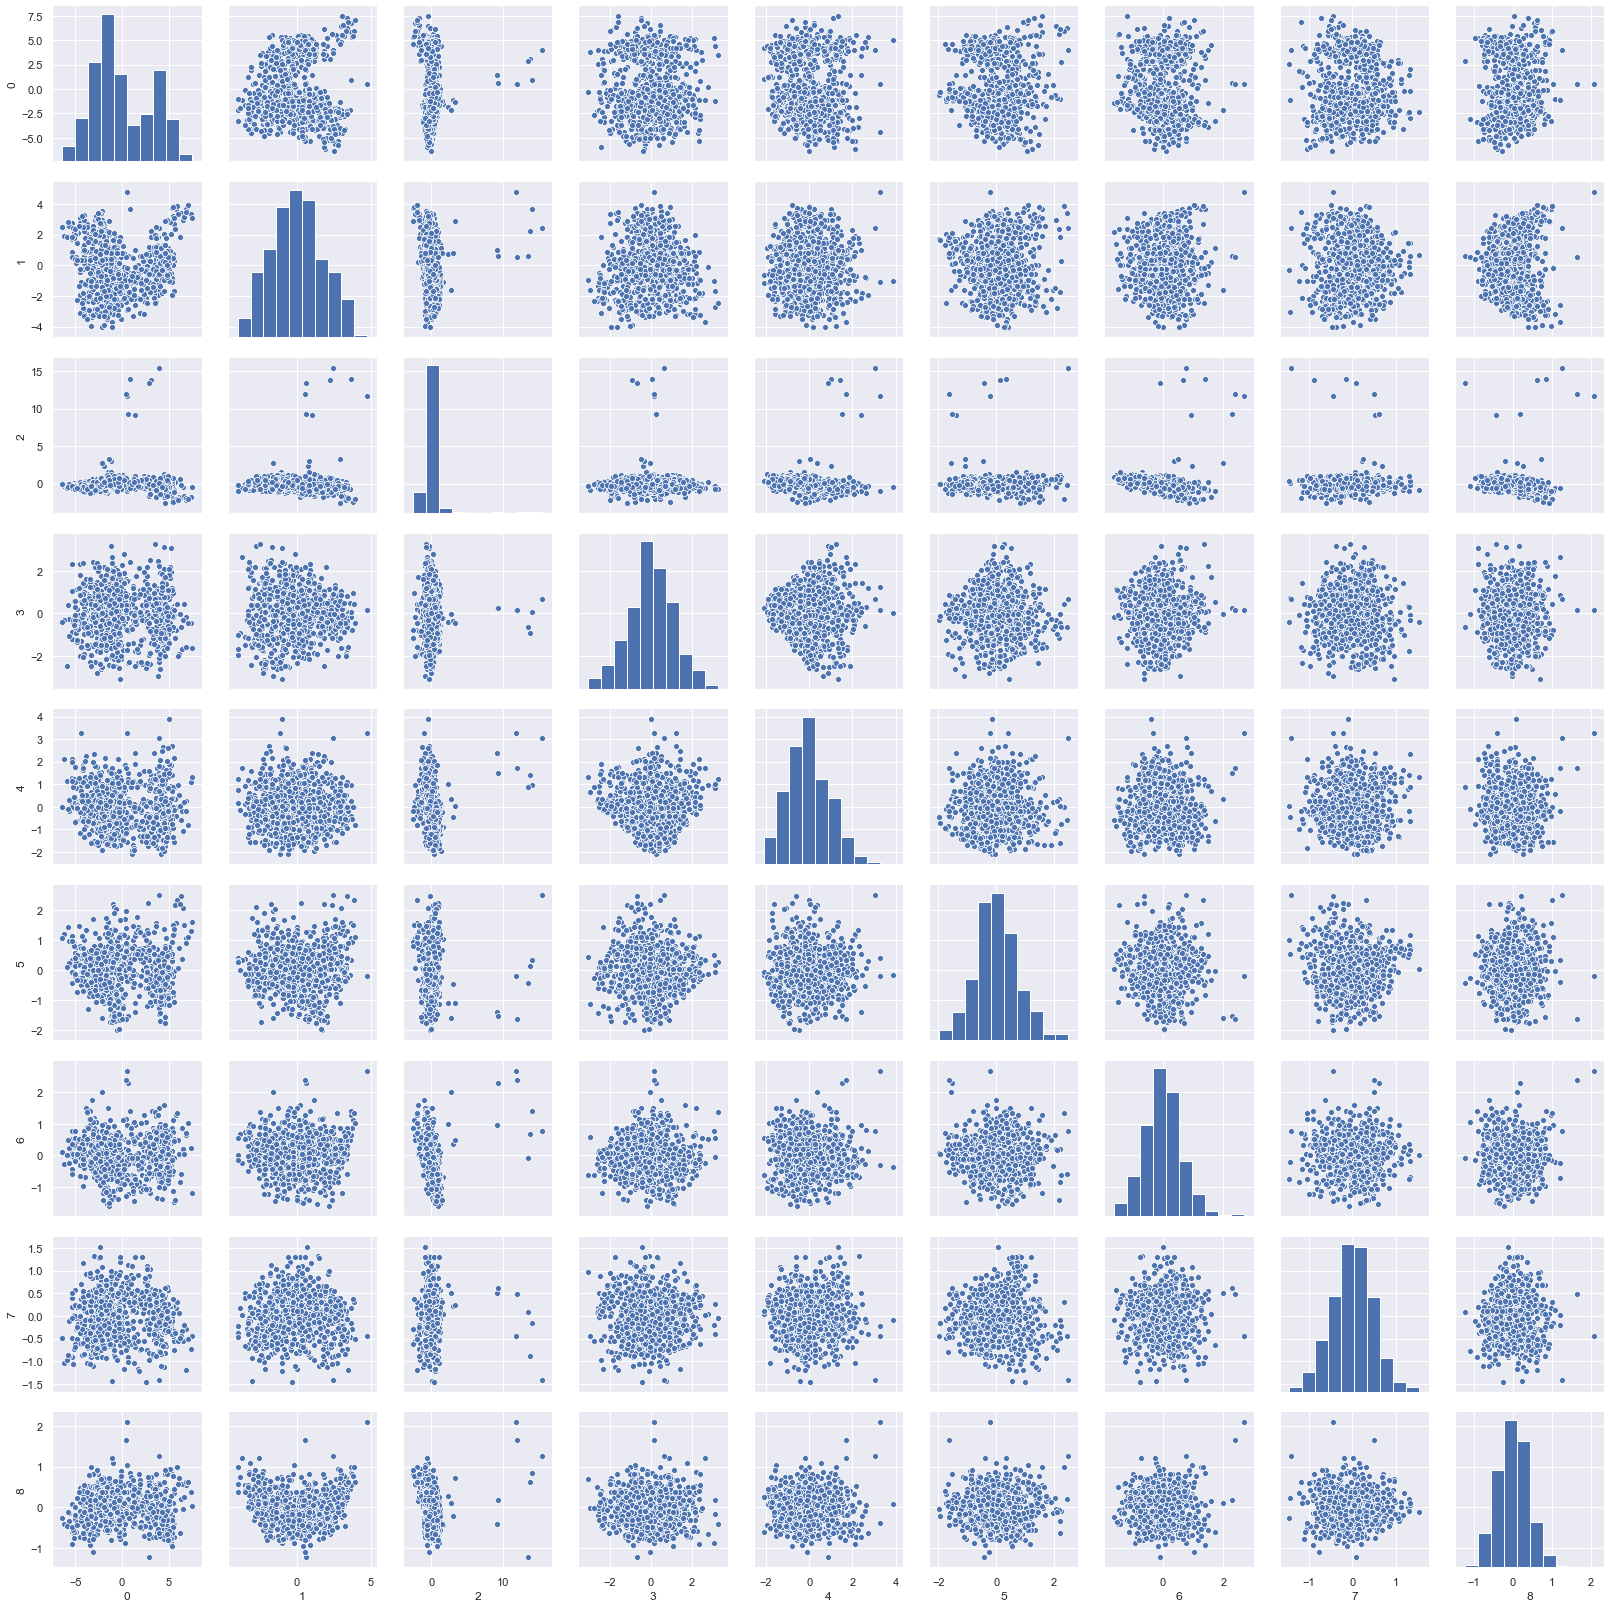

In [29]:
sn.pairplot(pd.DataFrame(Xpca9))

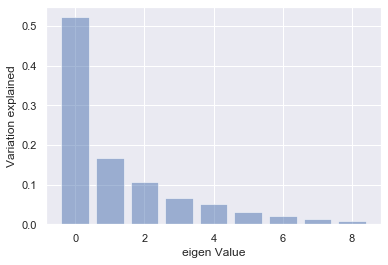

In [30]:
plt.bar(range(pca9.n_components_),pca9.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

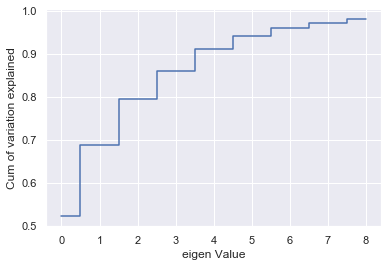

In [31]:
plt.step(range(pca9.n_components_),np.cumsum(pca9.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [32]:
# Now trying to see what is the result of SVM after the dimentions have been reduced

# a. C = 1 and kernel = linear
clf = svm.SVC(C=1, kernel = 'linear')
clf.fit(Xpca9 , y)
print("Accuracy with C = 1 and linear kernel is :", clf.score(Xpca9 , y))

# C = .5 and kernel = linear
clf1 = svm.SVC(C=.5, kernel = 'linear')
clf1.fit(Xpca9 , y)
print("Accuracy with C = .5 and linear kernel is :", clf1.score(Xpca9 , y))

# C = .05 and kernel = linear
clf2 = svm.SVC(C=.05, kernel = 'linear')
clf2.fit(Xpca9 , y)
print("Accuracy with C = .05 and linear kernel is :", clf2.score(Xpca9 , y))


# C = .01 and kernel = linear
clf3 = svm.SVC(C=.01, kernel = 'linear')
clf3.fit(Xpca9 , y)
print("Accuracy with C = .01 and linear kernel is :", clf3.score(Xpca9 , y))


Accuracy with C = 1 and linear kernel is : 0.9113475177304965
Accuracy with C = .5 and linear kernel is : 0.9113475177304965
Accuracy with C = .05 and linear kernel is : 0.8971631205673759
Accuracy with C = .01 and linear kernel is : 0.8676122931442081


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [33]:
# a. C = 1 and kernel = rbf
clf = svm.SVC(C=1, kernel = 'rbf', gamma = .025)
clf.fit(Xpca9 , y)
print("Accuracy with C = 1 and linear rbf is :", clf.score(Xpca9 , y))

# C = .5 and kernel = rbf
clf1 = svm.SVC(C=.5, kernel = 'rbf', gamma = .025)
clf1.fit(Xpca9 , y)
print("Accuracy with C = .5 and linear rbf is :", clf1.score(Xpca9 , y))

# C = .05 and kernel = rbf
clf2 = svm.SVC(C=.05, kernel = 'rbf', gamma = .025)
clf2.fit(Xpca9 , y)
print("Accuracy with C = .05 and linear rbf is :", clf2.score(Xpca9 , y))


# C = .01 and kernel = rbf
clf3 = svm.SVC(C=.01, kernel = 'rbf', gamma = .025)
clf3.fit(Xpca9 , y)
print("Accuracy with C = .01 and linear rbf is :", clf3.score(Xpca9 , y))

c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with C = 1 and linear rbf is : 0.9456264775413712
Accuracy with C = .5 and linear rbf is : 0.933806146572104
Accuracy with C = .05 and linear rbf is : 0.6099290780141844
Accuracy with C = .01 and linear rbf is : 0.5070921985815603


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## By reducing the dependent variable to half we still achieve a decent accuracy of 91 % with linear kernel and 94% with rbf kernel

In [34]:
# with 6 components let check the accuracy
pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [35]:
clf = svm.SVC(C=1, kernel = 'linear')
clf.fit(Xpca6 , y)
clf.score(Xpca6 , y)

c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7955082742316785

## It seems the accuracy get reduced drastically on further reducing the variables. So far we are getting a decent accuracy with 9 variables

In [36]:
# PCA with 11 variables
pca11 = PCA(11).fit(XScaled)
print(pca11.components_)
print(pca11.explained_variance_ratio_)
Xpca11 = pca11.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

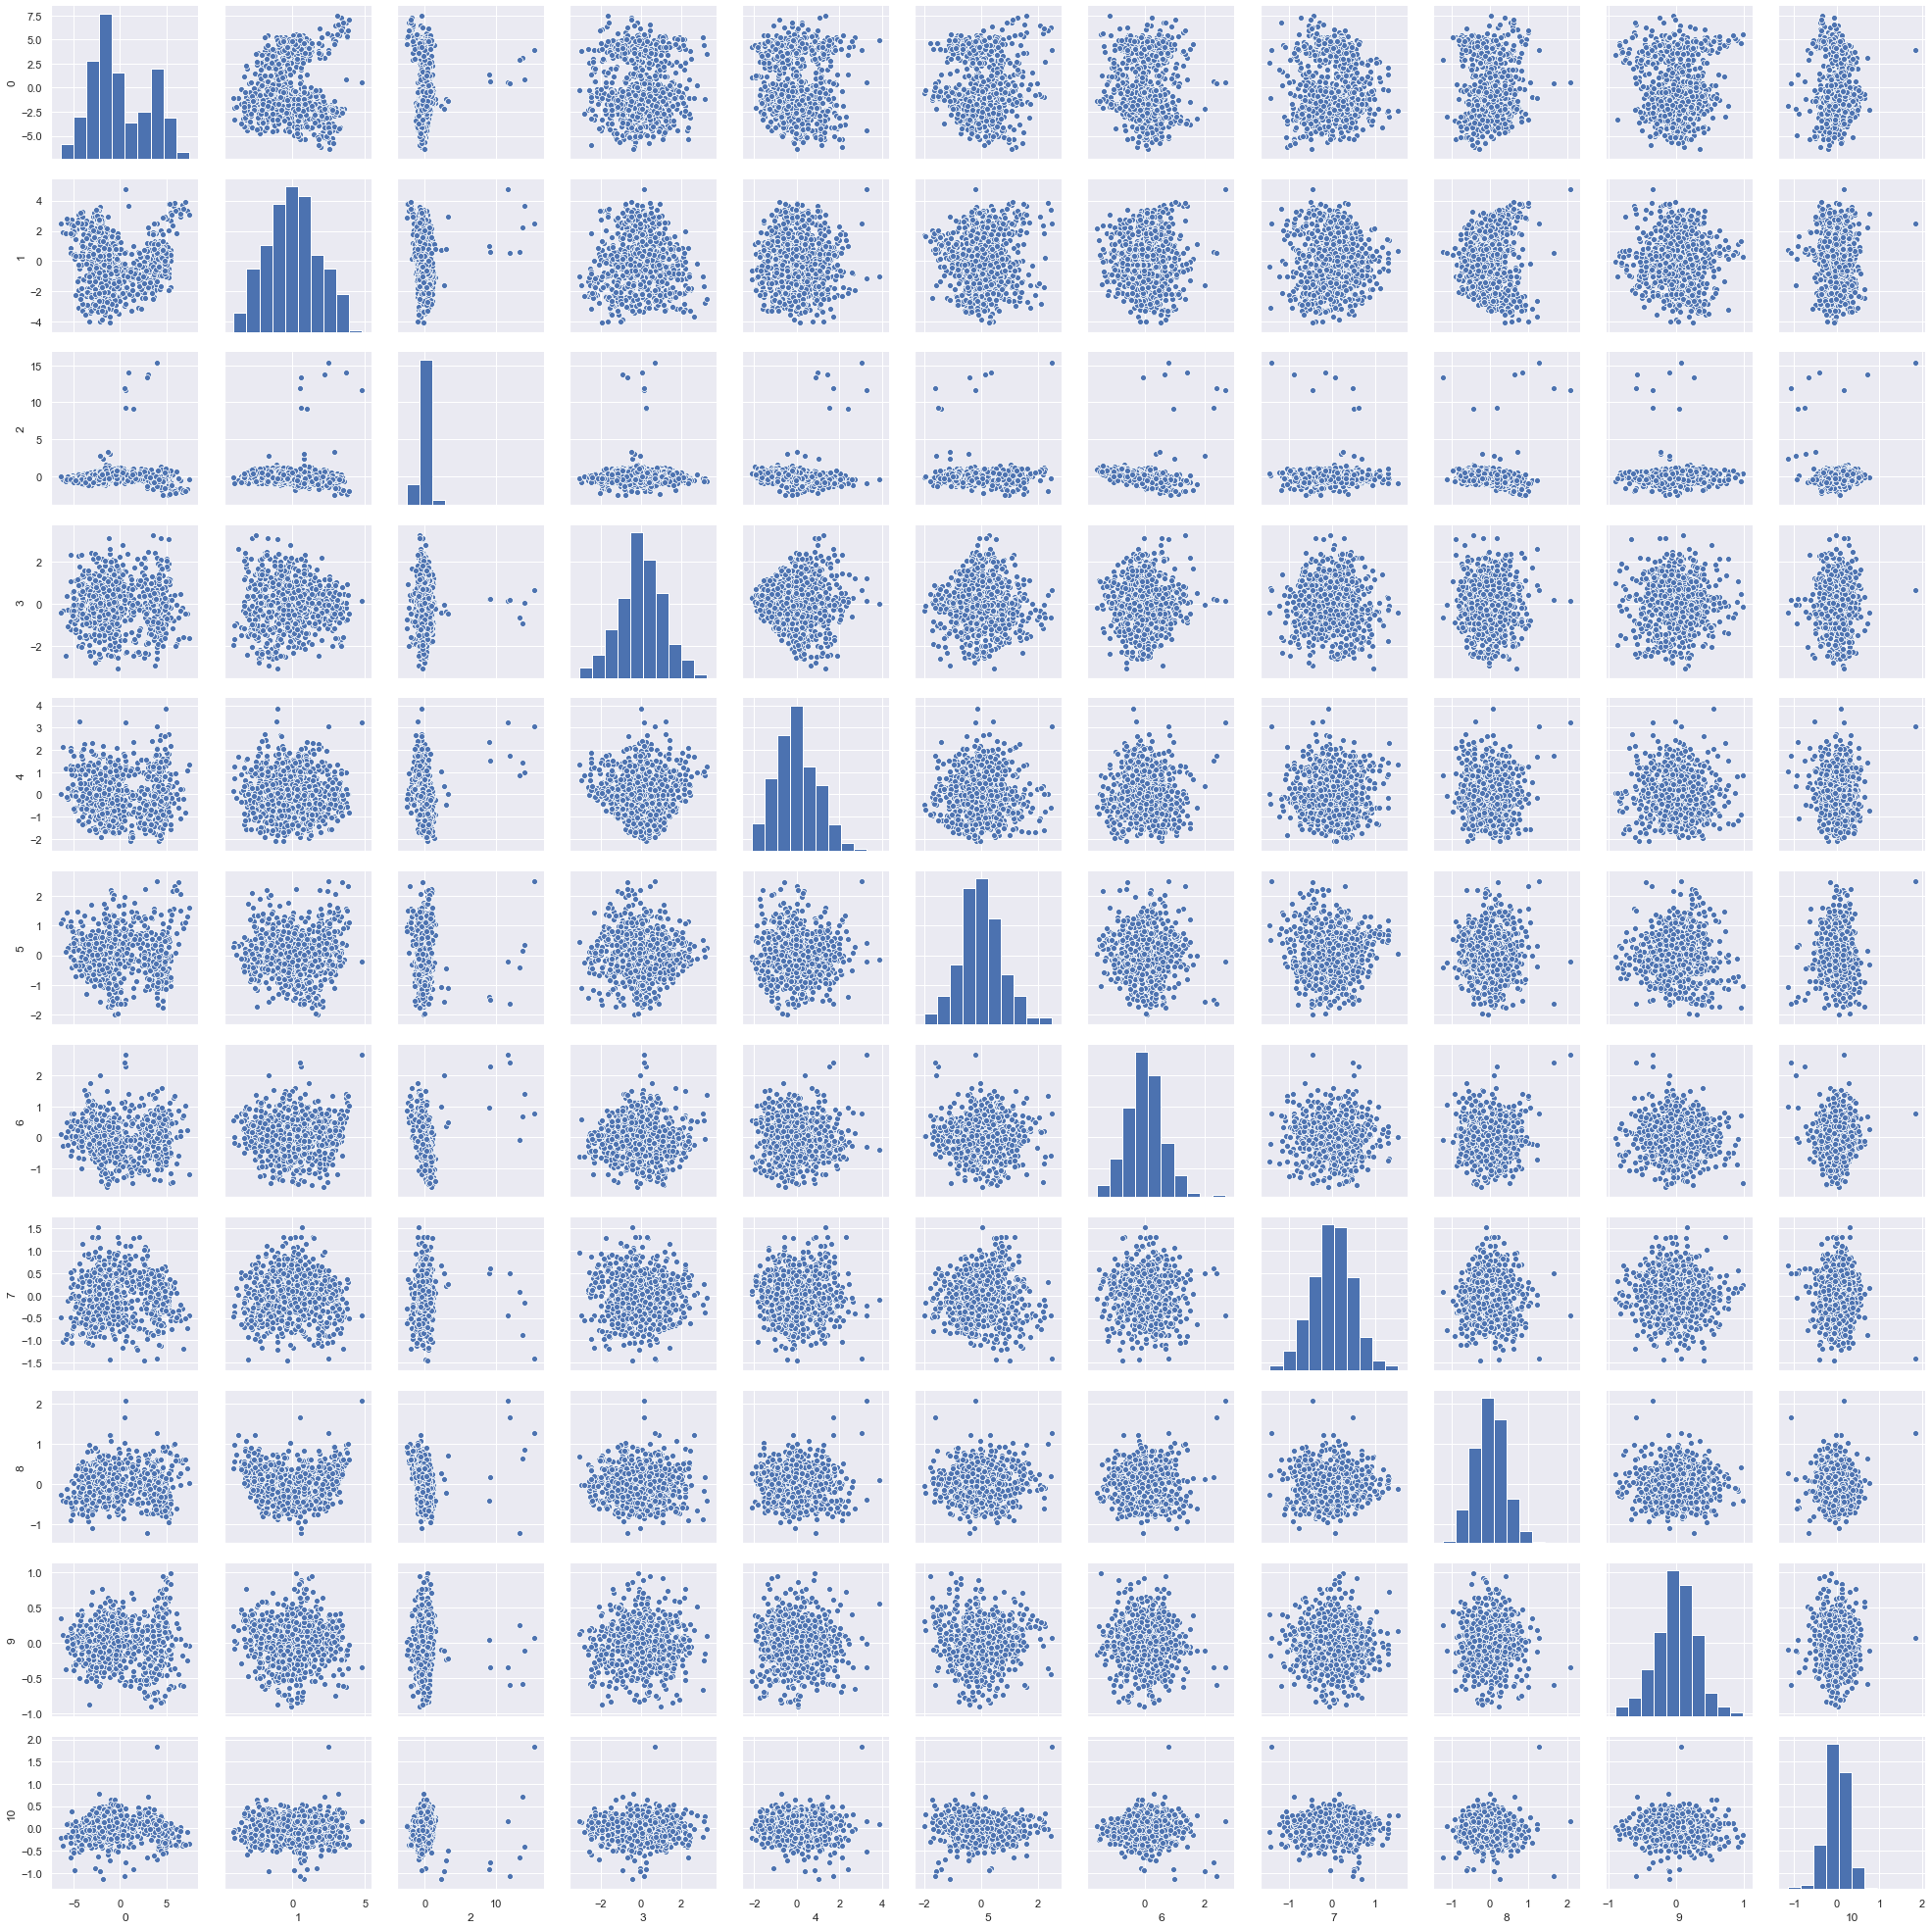

In [37]:
sn.pairplot(pd.DataFrame(Xpca11))

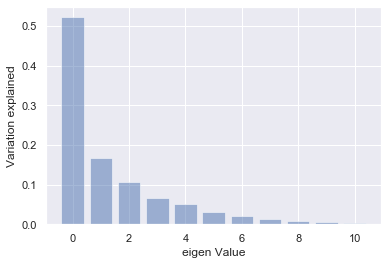

In [38]:
plt.bar(range(pca11.n_components_),pca11.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

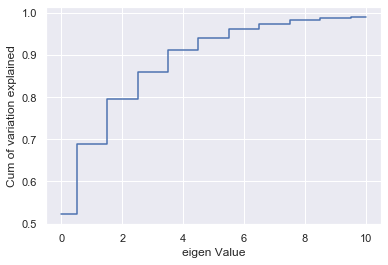

In [39]:
plt.step(range(pca11.n_components_),np.cumsum(pca11.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [40]:
# Now trying to see what is the result of SVM after the dimentions have been reduced

# a. C = 1 and kernel = linear
clf = svm.SVC(C=1, kernel = 'linear')
clf.fit(Xpca11 , y)
print("Accuracy with C = 1 and linear kernel is :", clf.score(Xpca11 , y))

# C = .5 and kernel = linear
clf1 = svm.SVC(C=.5, kernel = 'linear')
clf1.fit(Xpca11 , y)
print("Accuracy with C = .5 and linear kernel is :", clf1.score(Xpca11 , y))

# C = .05 and kernel = linear
clf2 = svm.SVC(C=.05, kernel = 'linear')
clf2.fit(Xpca11 , y)
print("Accuracy with C = .05 and linear kernel is :", clf2.score(Xpca11 , y))


# C = .01 and kernel = linear
clf3 = svm.SVC(C=.01, kernel = 'linear')
clf3.fit(Xpca11 , y)
print("Accuracy with C = .01 and linear kernel is :", clf3.score(Xpca11 , y))

Accuracy with C = 1 and linear kernel is : 0.9267139479905437
Accuracy with C = .5 and linear kernel is : 0.9267139479905437
Accuracy with C = .05 and linear kernel is : 0.9078014184397163
Accuracy with C = .01 and linear kernel is : 0.8853427895981087


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [41]:
# a. C = 1 and kernel = rbf
clf = svm.SVC(C=1, kernel = 'rbf', gamma = .025)
clf.fit(Xpca11 , y)
print("Accuracy with C = 1 and linear rbf is :", clf.score(Xpca11 , y))

# C = .5 and kernel = rbf
clf1 = svm.SVC(C=.5, kernel = 'rbf', gamma = .025)
clf1.fit(Xpca11 , y)
print("Accuracy with C = .5 and linear rbf is :", clf1.score(Xpca11 , y))

# C = .05 and kernel = rbf
clf2 = svm.SVC(C=.05, kernel = 'rbf', gamma = .025)
clf2.fit(Xpca11 , y)
print("Accuracy with C = .05 and linear rbf is :", clf2.score(Xpca11 , y))


# C = .01 and kernel = rbf
clf3 = svm.SVC(C=.01, kernel = 'rbf', gamma = .025)
clf3.fit(Xpca11 , y)
print("Accuracy with C = .01 and linear rbf is :", clf3.score(Xpca11 , y))


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with C = 1 and linear rbf is : 0.9621749408983451


c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files (x86)\python37-32\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy with C = .5 and linear rbf is : 0.9444444444444444
Accuracy with C = .05 and linear rbf is : 0.6087470449172577
Accuracy with C = .01 and linear rbf is : 0.5070921985815603


## It seems the accuracy remains the same by reducing variables from 19 to 11 but with rbf kernel and C value 1

In [42]:
x_train, x_test, y_train, y_test  = train_test_split(Xpca11, y, test_size = .3)
x_train

array([[ 1.72246885e+00,  2.86034411e-02, -1.38196779e-02, ...,
         1.37941826e-01,  1.78907200e-01,  2.67632618e-01],
       [ 1.83233929e+00, -2.12580490e+00, -4.04097637e-01, ...,
         4.83120856e-01,  1.01232959e-01,  1.09877576e-01],
       [-3.41154354e+00,  3.19663646e-01, -3.12610066e-01, ...,
        -4.00637009e-01,  6.09505609e-02, -4.95974059e-03],
       ...,
       [ 2.20536781e+00, -2.29272910e-01,  6.79410379e-01, ...,
        -1.88603617e-01, -5.24034612e-01, -1.91382410e-01],
       [-1.32250775e-01, -2.31607539e+00, -1.58437212e-01, ...,
         8.82449045e-01, -2.45420779e-01, -3.10160675e-01],
       [-5.91638399e+00,  1.82920714e+00, -6.44462619e-01, ...,
        -4.47886580e-01, -3.77686221e-01, -1.82438607e-01]])

In [43]:
# Actual no of cars, bus and van in actual dataset
data["class"].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [44]:
y_train["class"].value_counts()

car    299
bus    154
van    139
Name: class, dtype: int64